In [4]:
import geopandas as gpd
import pandas as pd
import pickle as pkl
# import networkx as nx
import matplotlib.pyplot as plt 

In [ ]:

df = pd.read_csv("election_data_pl/wyniki_gl_po_gminach_sejm_2023.csv", encoding="utf-8", delimiter=",")

graph = pkl.load(open("temp/graph_cut_algorithm.pkl", "rb"))

gdf =  gpd.read_file("shapefiles/gminy_polska_2024/gminy_polska_2024.shp", encoding="utf-8")


# gdf['JPT_KOD_JE'] = gdf['JPT_KOD_JE'].astype(str)
# df['TERYT Gminy'] = df['TERYT Gminy'].astype(str)

# for index, row in df.iterrows():
# 	county_id = str(row.at['TERYT Gminy'])
# 	if county_id == '0':
# 		county_id = '146501' #ID Warszawy
# 	elif len(county_id) == 5:
# 		county_id = '0' + county_id
	
# 	df.at[index, 'TERYT Gminy'] = county_id

# #sum values for TERYT Gminy = 146501
# warsaw_data = df[df['TERYT Gminy'] == '146501']
# warsaw_data = warsaw_data.groupby(['TERYT Gminy']).sum()
# warsaw_data['TERYT Gminy'] = '146501'
# df = df[df['TERYT Gminy'] != '146501']
# df = pd.concat([df, warsaw_data])

    
# # Merging GeoDataFrame (gdf) z DataFrame (df)
# merged_gdf = gdf.merge(df, left_on='JPT_KOD_JE', right_on='TERYT Gminy')

# merged_gdf.drop(columns=['TERYT Gminy', 'Gmina'], inplace=True)

# merged_gdf

    

In [19]:
#change column names
len(merged_gdf.columns)
dict_columns = {
    'LICZ_UPR': merged_gdf.columns[3],
    'LICZ_GŁ': merged_gdf.columns[4],
    'KOMIT_1': merged_gdf.columns[5],
    'KOMIT_2': merged_gdf.columns[6],
    'KOMIT_3': merged_gdf.columns[7],
    'KOMIT_4': merged_gdf.columns[8],
    'KOMIT_5': merged_gdf.columns[9],
    'KOMIT_6': merged_gdf.columns[10],
    'KOMIT_7': merged_gdf.columns[11],
    'KOMIT_8': merged_gdf.columns[12],
    'KOMIT_9': merged_gdf.columns[13],
    'KOMIT_10': merged_gdf.columns[14],
    'KOMIT_11': merged_gdf.columns[15],
    'KOMIT_12': merged_gdf.columns[16]
}

#change make a reverse mapping
dict_columns = {v: k for k, v in dict_columns.items()}
merged_gdf.rename(columns=dict_columns, inplace=True)

merged_gdf



,JPT_KOD_JE,JPT_NAZWA_,LICZ_UPR,LICZ_UPR,LICZ_GŁ,KOMIT_1,KOMIT_2,KOMIT_3,KOMIT_4,KOMIT_5,KOMIT_6,KOMIT_7,KOMIT_8,KOMIT_9,KOMIT_10,KOMIT_11,KOMIT_12
0,100705,Paradyż,3292,2456,33,454,58,1605,147,119,36,4,0,0,0,0,"POLYGON ((20.17952 51.29331, 20.17941 51.29334..."
1,261004,Skarżysko Kościelne,4573,3183,91,347,219,1469,241,750,47,9,10,0,0,0,"POLYGON ((20.93438 51.1117, 20.93444 51.1117, ..."
2,260402,Bodzentyn,8806,5923,250,738,280,3224,409,901,83,16,22,0,0,0,"POLYGON ((20.84919 50.95801, 20.84912 50.95803..."
3,142308,Wieniawa,4109,3039,39,316,99,2006,253,287,35,4,0,0,0,0,"POLYGON ((20.85985 51.41824, 20.86032 51.41817..."
4,120802,Gołcza,4762,3355,39,543,158,1944,238,361,72,0,0,0,0,0,"MULTIPOLYGON (((19.88587 50.30885, 19.88586 50..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,302403,Kaźmierz,7059,5322,95,880,446,1242,373,2080,206,0,0,0,0,0,"POLYGON ((16.54361 52.55783, 16.54367 52.55777..."
2473,302404,Obrzycko,3410,2345,61,373,149,765,144,813,40,0,0,0,0,0,"POLYGON ((16.52818 52.75406, 16.5283 52.754, 1..."
2474,141006,Stara Kornica,3544,2311,35,253,65,1444,242,195,65,0,8,0,4,0,"POLYGON ((22.92016 52.24814, 22.92154 52.24785..."
2475,181802,Bojanów,5876,3624,46,273,132,2510,307,299,57,0,0,0,0,0,"POLYGON ((21.98198 50.52807, 21.98323 50.52393..."


In [20]:
merged_gdf.to_file("temp/gminy_sejm_2023.shp", encoding="utf-8")

ValueError: GeoDataFrame cannot contain duplicated column names.

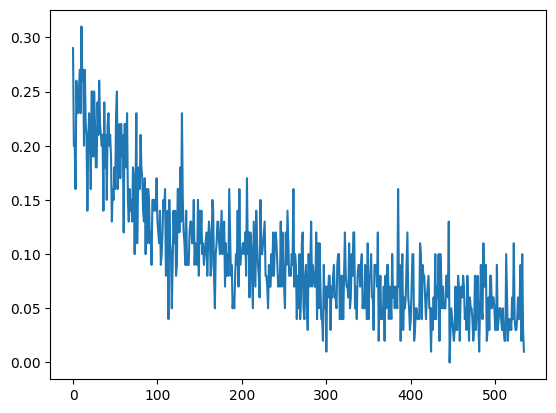

In [130]:
data = pkl.load(open("temp/favouritism_alg_data.pkl", "rb"))

# plot data (type np.array) - each row is % of accepted and rejected proposals
plt.plot(data)

In [136]:
districts = pkl.load(open("temp/favouritism_alg.pkl", "rb"))
merged_gdf = gpd.read_file("temp/gminy_sejm_2023/gminy_sejm_2023.shp", encoding="utf-8")

In [137]:
merged_gdf['district'] = -1
node_to_district = {node: district for district, nodes in enumerate(districts) for node in nodes}
merged_gdf['district'] = merged_gdf['JPT_KOD_JE'].map(node_to_district)
# sum values for KOMIT_XX columns for each district
merged_gdf = merged_gdf.drop(columns=['JPT_KOD_JE', 'JPT_NAZWA_', 'LICZ_UPR', 'LICZ_GŁ'])
merged_gdf['district'] = merged_gdf['district'].astype(str)
merged_gdf = merged_gdf.dissolve(by='district', aggfunc='sum')
merged_gdf.reset_index(inplace=True)


In [138]:
#get max from columns KOMIT_1 to KOMIT_12

dict_columns = pkl.load(open("pickle_files/dict_columns_sejm_2023.pkl", "rb"))

# #get KOMITs which names in dict_columns contain "PO", "PSL", "Lewica"
# komit_columns = [col for col, name in dict_columns.items() if any(keyword in name for keyword in ["PO", "PSL", "Lewica"])]

# #sum columns from komit_columns
# districts_gdf['PO_PSL_Lewica'] = districts_gdf[komit_columns].sum(axis=1)

merged_gdf['max'] = merged_gdf[['KOMIT_1', 'KOMIT_2', 'KOMIT_3', 'KOMIT_4', 'KOMIT_5', 'KOMIT_6', 'KOMIT_7', 'KOMIT_8', 'KOMIT_9', 'KOMIT_10', 'KOMIT_11', 'KOMIT_12']].idxmax(axis=1)

merged_gdf['max'] = merged_gdf['max'].map(dict_columns)

merged_gdf.head(1)

,district,geometry,KOMIT_1,KOMIT_2,KOMIT_3,KOMIT_4,KOMIT_5,KOMIT_6,KOMIT_7,KOMIT_8,KOMIT_9,KOMIT_10,KOMIT_11,KOMIT_12,max
0,0,"POLYGON ((18.72909 54.34111, 18.7283 54.34139,...",3434,43187,32730,59689,16843,139254,3230,0,0,0,0,0,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...


In [139]:
#count each max value
merged_gdf['max'].value_counts()

max
KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ                               309
KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI    151
Name: count, dtype: int64

<function legend at 0x000002818B39F6A0>


<Figure size 10000x10000 with 0 Axes>

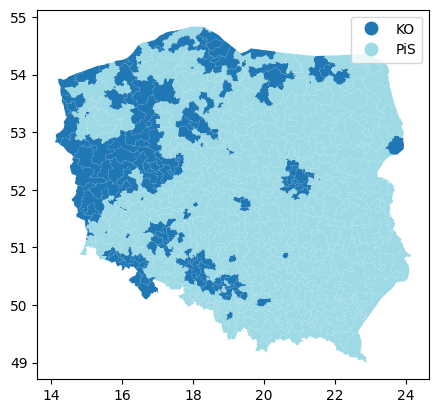

In [140]:
#rename max values to be more readable
merged_gdf['max'] = merged_gdf['max'].map({
    'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ' : 'PiS',
    'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI' : 'KO',
    'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE': 'TD - PSL, P20250',
    'PO_PSL_Lewica': 'Pakt Senacki'
})
#plot districts with colors based on the most voted party
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))
merged_gdf.plot(column='max', cmap='tab20', legend=True)
print(plt.legend)
plt.show()


In [31]:
#reduce polygons in districts_gdf
districts_gdf['geometry'] = districts_gdf['geometry'].simplify(tolerance=0.007, preserve_topology=True)

In [32]:
districts_gdf.head(10)
#drop columns 'KOMIT_1' to 'KOMIT_12'
districts_gdf.drop(columns=['JPT_KOD_JE',	'JPT_NAZWA_',	'LICZ_UPR',	'LICZ_GŁ','KOMIT_1', 'KOMIT_2', 'KOMIT_3', 'KOMIT_4', 'KOMIT_5', 'KOMIT_6', 'KOMIT_7', 'KOMIT_8', 'KOMIT_9', 'KOMIT_10', 'KOMIT_11', 'KOMIT_12'], inplace=True)

In [33]:
#rename column 'max' to 'Winner'
districts_gdf.rename(columns={'max': 'winner'}, inplace=True)

In [34]:
#in column 'winner' change values: PIS to 1, KO to 2
districts_gdf['winner'] = districts_gdf['winner'].map({
    'PiS': 1,
    'KO': 2,
    'TD - PSL, P20250': 3,
    'Pakt Senacki': 4
})

In [35]:
districts_gdf.to_file("temp/districts_sejm_2023_test_strony.geojson", encoding="utf-8")

<Axes: >

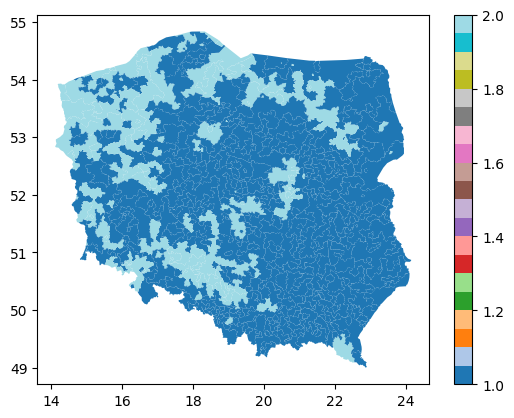

In [36]:
districts_gdf.plot(column='winner', cmap='tab20', legend=True)

In [37]:
districts_gdf.head(1)

,district,geometry,winner
0,0,"POLYGON ((19.01663 54.05152, 19.02948 54.04379...",2
